In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls

In [2]:
#importing dataset

df=pd.read_csv('Mall_Customers.csv')

In [3]:
#Exploring the dataset

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
#checking missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Distribution of Gender')

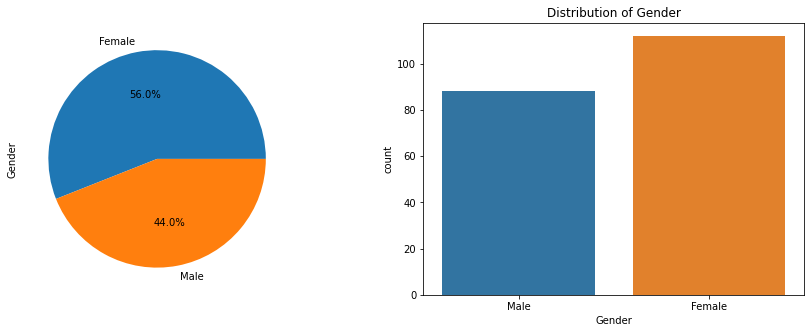

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Gender'])
plt.title('Distribution of Gender')


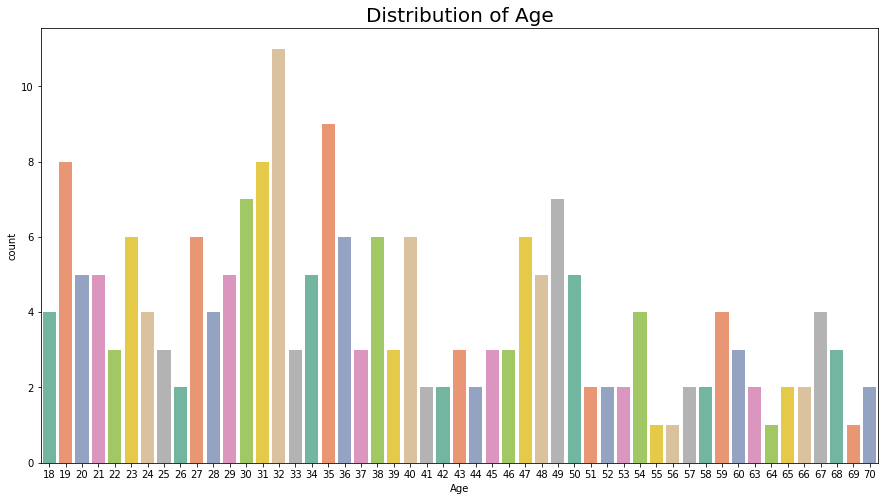

In [9]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette = 'Set2')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

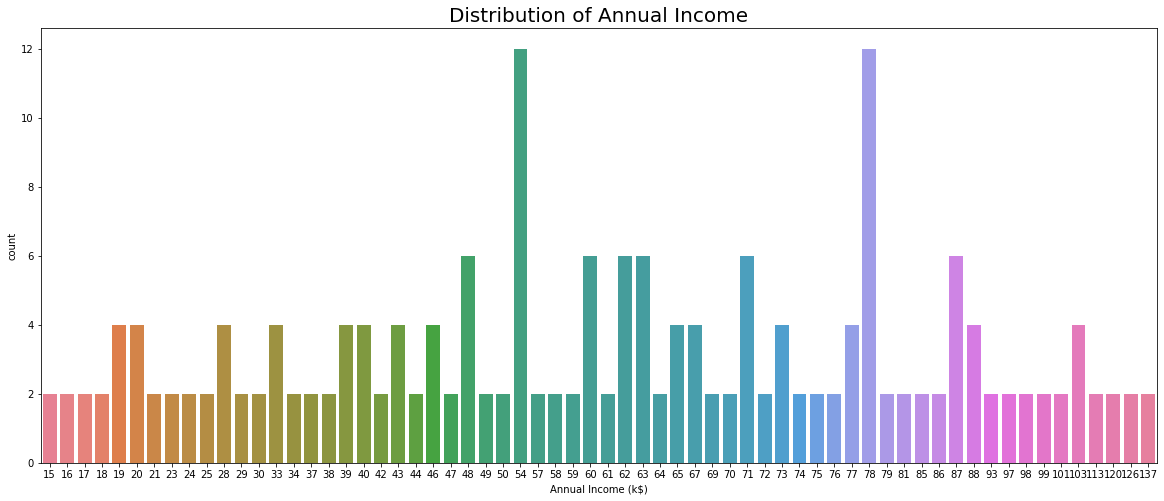

In [10]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Annual Income (k$)'], palette = 'husl')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

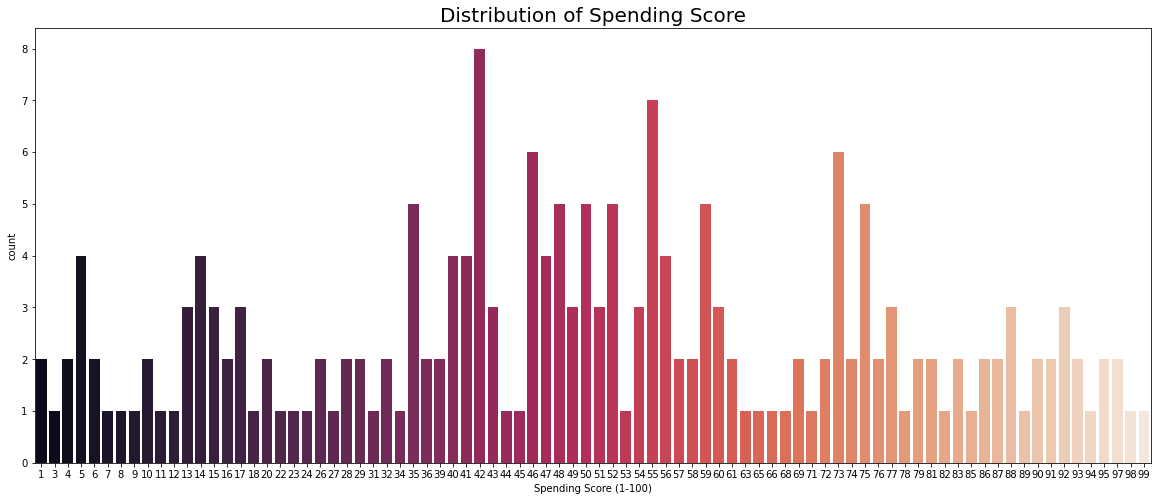

In [11]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Spending Score (1-100)'], palette = 'rocket')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

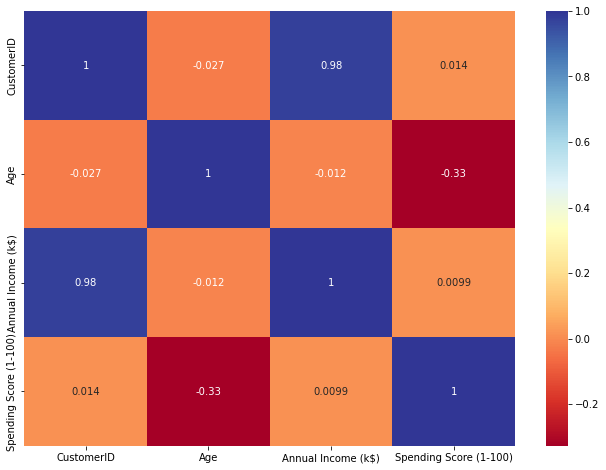

In [12]:
plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])

In [14]:
df['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32

In [15]:
data_id = df[['CustomerID','Gender']].copy()

In [16]:
data_predictor = df.drop(['CustomerID', 'Gender'], axis=1)

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
for num_clusters in range(2,10):
   # Instantiate k-means
   kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=50)
   # Fit the
   kmeans.fit(data_predictor)
   # Labels of each cluster point
   cluster_labels = kmeans.labels_
  
   silhoutte_avg = silhouette_score(data_predictor, cluster_labels)
   print("For n_clusters={0} the silhouette score={1}".format(num_clusters, silhoutte_avg))

For n_clusters=2 the silhouette score=0.293166070535953
For n_clusters=3 the silhouette score=0.3839349967742105
For n_clusters=4 the silhouette score=0.40546302077733304
For n_clusters=5 the silhouette score=0.44428597560893024
For n_clusters=6 the silhouette score=0.4523443947724053
For n_clusters=7 the silhouette score=0.4398198217929885
For n_clusters=8 the silhouette score=0.4307991110543737
For n_clusters=9 the silhouette score=0.4139726023986123


Text(0, 0.5, 'Inertia')

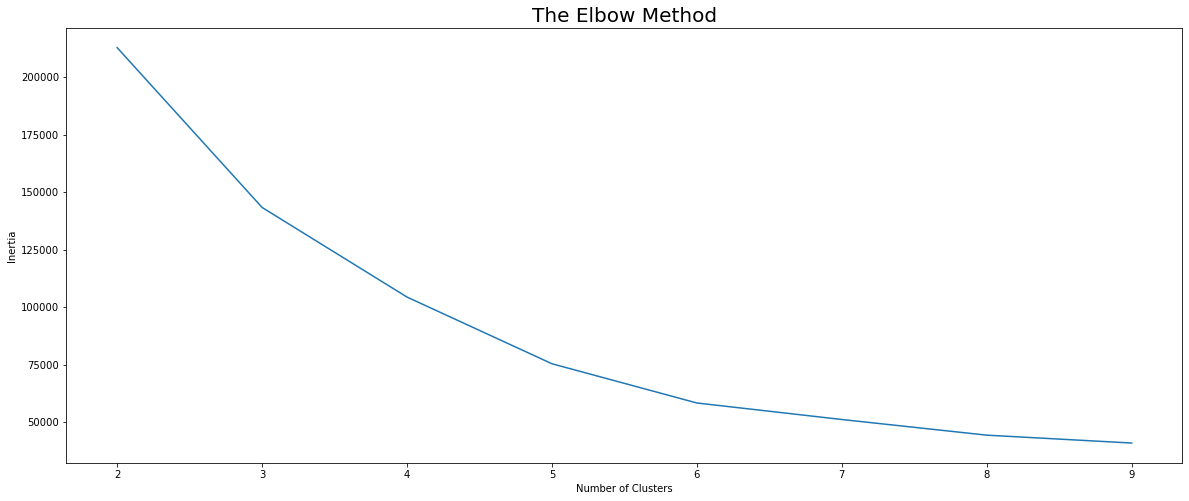

In [18]:
ssd = []
for k in range(2,10):
   kmeans = KMeans(n_clusters = k).fit(data_predictor)
   ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [19]:
kmeans = KMeans(n_clusters=5, max_iter=50, random_state=50)

In [20]:
kmeans.fit(data_predictor)

KMeans(max_iter=50, n_clusters=5, random_state=50)

In [21]:
kmeans.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [22]:
data_kmeans = data_predictor.copy()

In [23]:
data_kmeans['ClusterID'] = kmeans.labels_
data_kmeans.head()

,Age,Annual Income (k$),Spending Score (1-100),ClusterID
0,19,15,39,4
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4


In [24]:
data_kmeans['ClusterID'].value_counts()

1    79
3    39
0    36
4    23
2    23
Name: ClusterID, dtype: int64

In [25]:
data_kmeans = pd.concat([data_id, data_kmeans], axis=1)
data_kmeans.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ClusterID
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


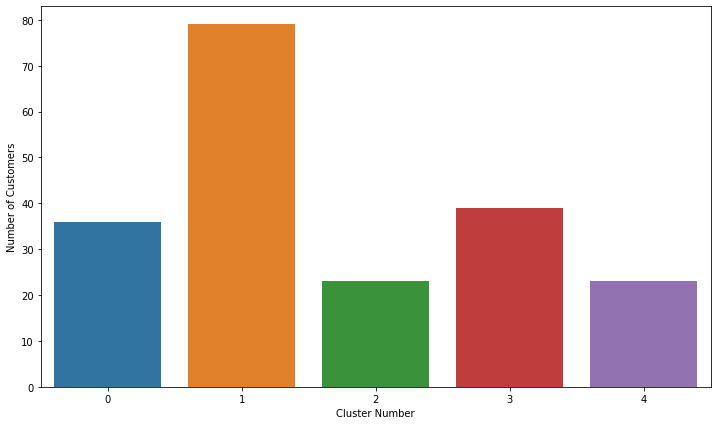

In [26]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=data_kmeans.groupby(['ClusterID']).count()['CustomerID'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of Customers")

In [27]:
data_clustered = pd.merge(df, data_kmeans[['CustomerID','ClusterID']], on='CustomerID')
data_clustered.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ClusterID
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

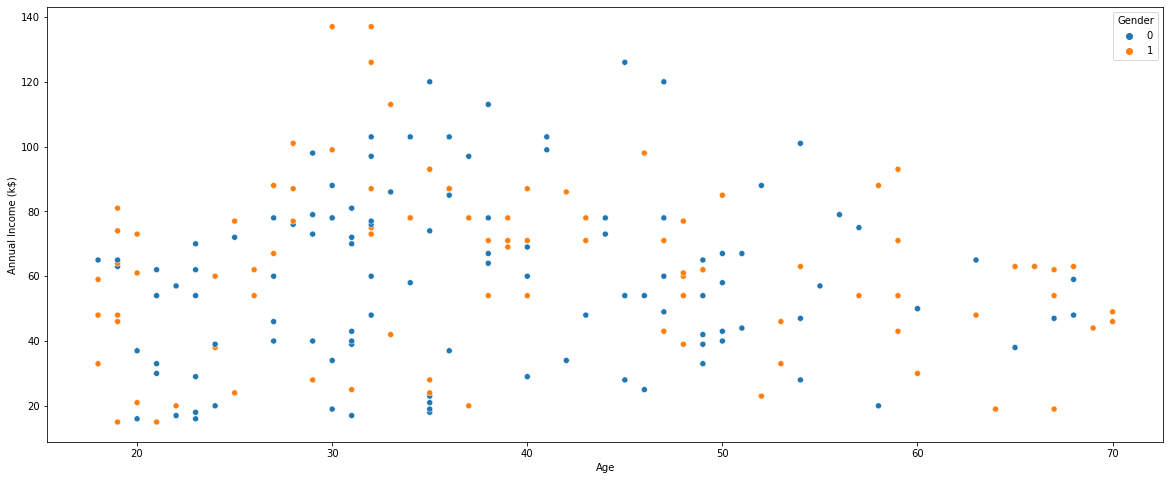

In [28]:
sns.scatterplot(x = "Age", y = "Annual Income (k$)", data = data_clustered, hue = "Gender")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

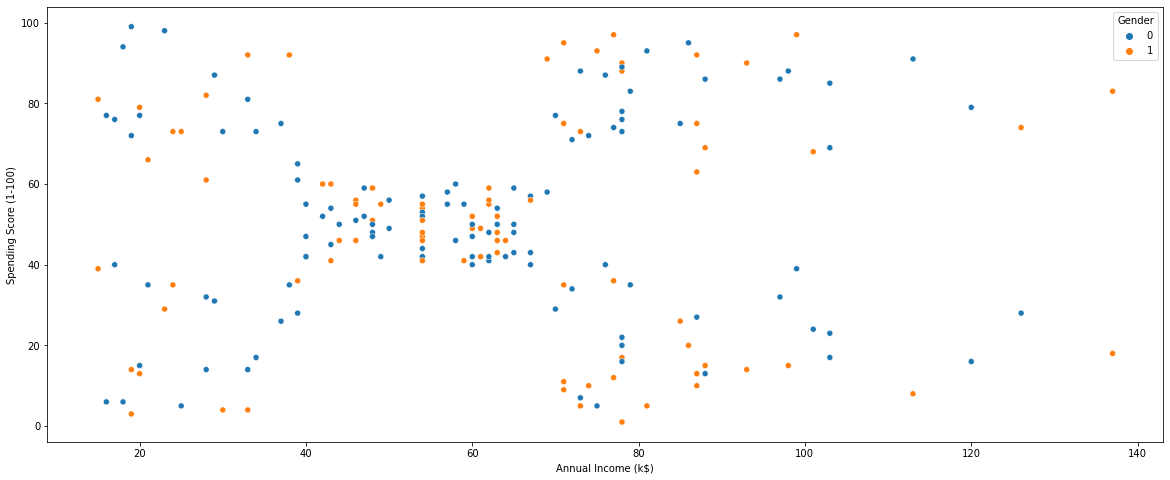

In [29]:
sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = data_clustered, hue = "Gender")

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

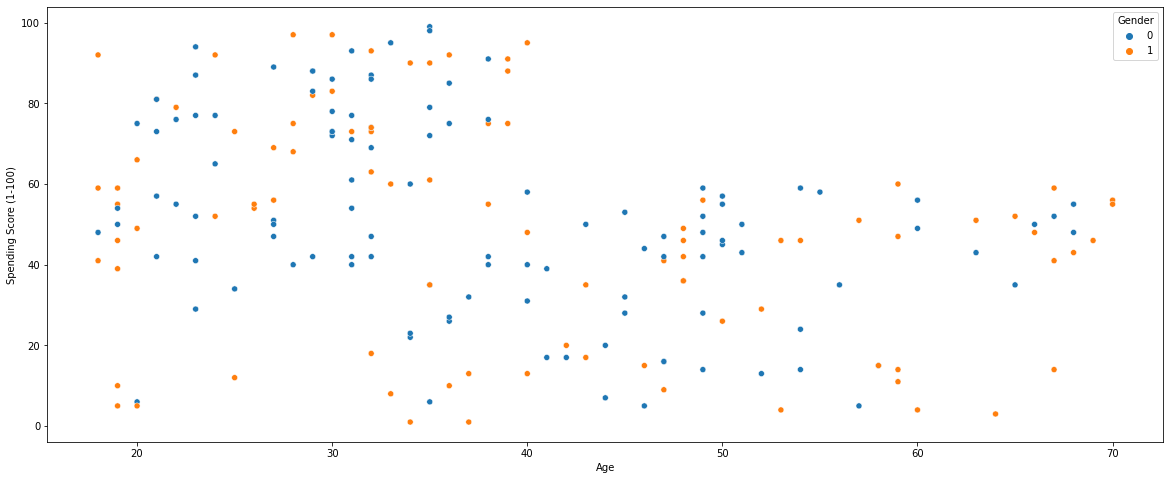

In [30]:
sns.scatterplot(x = "Age", y = "Spending Score (1-100)", data = data_clustered, hue = "Gender")

In [31]:
means_k = KMeans(n_clusters=5, random_state=0)
means_k.fit(data_predictor)
labels = means_k.labels_
centroids = means_k.cluster_centers_

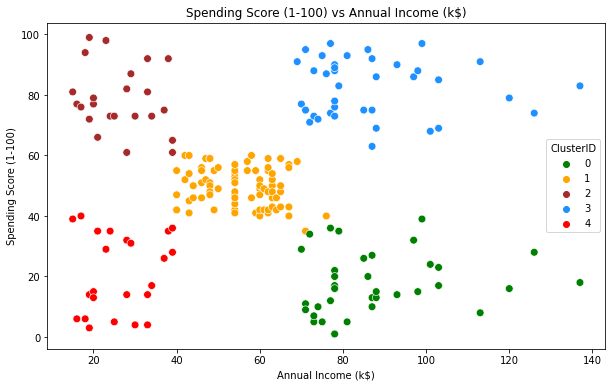

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue='ClusterID',  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = data_clustered  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [34]:
trace1 = go.Scatter3d(
   x= data_predictor['Spending Score (1-100)'],
   y= data_predictor['Annual Income (k$)'],
   z= data_predictor['Age'],
   mode='markers',
    marker=dict(
       color = labels,
       size= 10,
       line=dict(
           color= labels,
       ),
       opacity = 0.9
    )
)
layout = go.Layout(
   title= 'Clusters',
   scene = dict(
           xaxis = dict(title  = 'Spending Score (1-100)'),
           yaxis = dict(title  = 'Annual Income (k$)'),
           zaxis = dict(title  = 'Age')
       )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)